In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
%matplotlib inline
pd.set_option("display.max_colwidth", 200)

In [2]:
train = pd.read_csv("train_E6oV3lV.csv")
test = pd.read_csv("test_tweets_anuFYb8.csv")

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [4]:
combined = train.append(test,ignore_index=True)

c:\users\kit9062\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


#### Removing @user

In [5]:
def remove_pattern(input_text,pattern):
    r = re.findall(pattern,input_text)
    for i in r:
        input_text = re.sub(i,"",input_text)
    return input_text


In [6]:
combined['tidy_tweet'] = np.vectorize(remove_pattern)(combined['tweet'],"@[\w]*")

In [7]:
combined.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


#### Removing the punctuations, numbers and punctuations

In [8]:
combined['tidy_tweet'] = combined['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")

In [9]:
combined.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


#### Removing short words

In [10]:
combined["tidy_tweet"] = combined["tidy_tweet"].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))

In [11]:
combined.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


#### Tokenization

In [12]:
tokenized_tweet = combined['tidy_tweet'].apply(lambda x: x.split())

In [13]:
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

#### Stemming

Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.

In [14]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet.head()

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                              [bihday, your, majesti]
3                                                     [#model, love, take, with, time]
4                                                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [15]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

combined['tidy_tweet'] = tokenized_tweet

In [16]:
combined.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


In [17]:
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [18]:
HT_regular = hashtag_extract(combined['tidy_tweet'][combined['label']==0]) 
HT_negative= hashtag_extract(combined['tidy_tweet'][combined['label']==1])


In [19]:
HT_regular

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift'],
 ['travelingram', 'dalat', 'ripinkyli

In [20]:
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])


In [21]:
HT_regular

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 'gettingf',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconfer',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop',
 'enoughisenough',
 'dontph

#### Non-Racist tweets

In [22]:
a = nltk.FreqDist(HT_regular)
a

FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

In [23]:
d = pd.DataFrame({'Hashtag' : list(a.keys()),'Count':list(a.values())})

In [24]:
d = d.nlargest(columns="Count",n=20)

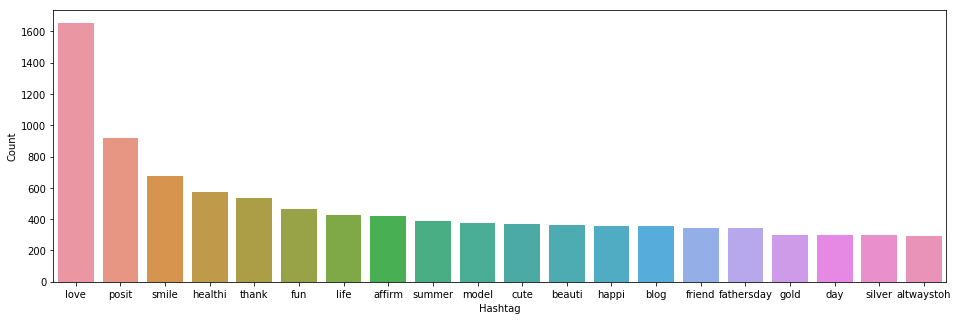

In [25]:
plt.figure(figsize=(16,5))
sns.barplot(data=d,x="Hashtag",y="Count")

#### Racist tweets

In [26]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({"Hashtags":list(b.keys()),"Count":list(b.values())})
e = e.nlargest(columns="Count",n=20)

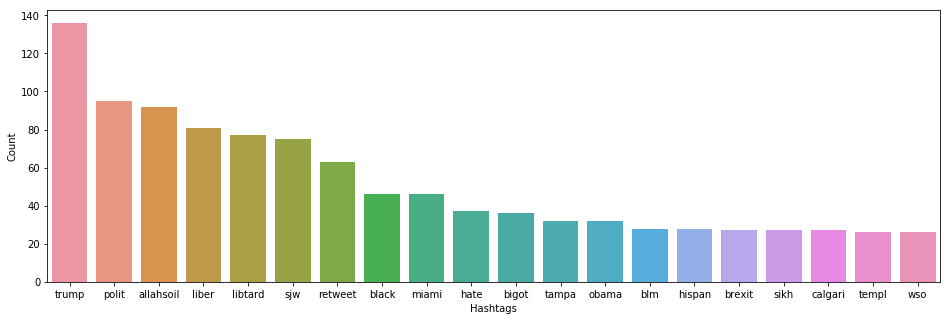

In [27]:
plt.figure(figsize=(16,5))
sns.barplot(data=e,x="Hashtags",y="Count")

Now to analyse the preprocessed data we will convert it into features

We will use the following techinques

#### 1. Bag of words

In [28]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import gensim

In [29]:
bow_vectorizer = CountVectorizer(max_df=0.9,min_df=2,max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(combined['tidy_tweet'])
bow.shape

(49159, 1000)

#### 2. TF-IDF

In [30]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9,min_df=2,max_features=1000,stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combined['tidy_tweet'])
tfidf.shape

(49159, 1000)

## Modelling

### 1. Linear Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

##### Bag of words prediction

In [32]:
train_bow = bow[:31962,:] 
test_bow = bow[31962:,:]
X_train_BOW,X_test_BOW,y_train_BOW,y_test_BOW = train_test_split(train_bow,train['label'],random_state=42,test_size=0.3)

In [33]:
logreg = LogisticRegression()
logreg.fit(X_train_BOW,y_train_BOW)

c:\users\kit9062\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
prediction = logreg.predict_proba(X_test_BOW)

In [35]:
prediction

array([[9.99260384e-01, 7.39616207e-04],
       [9.88846779e-01, 1.11532214e-02],
       [9.84778655e-01, 1.52213449e-02],
       ...,
       [9.41146472e-01, 5.88535280e-02],
       [3.28647455e-01, 6.71352545e-01],
       [9.78999881e-01, 2.10001188e-02]])

In [36]:
prediction_int = prediction[:,1] >= 0.3

In [37]:
prediction_int = prediction_int.astype(np.int)

In [38]:
prediction_int

array([0, 0, 0, ..., 0, 1, 0])

In [39]:
f1_score(y_test_BOW,prediction_int)

0.5307820299500832

#### Let's make prediction on test data using bag of words model and submit it on https://datahack.analyticsvidhya.com/contest/practice-problem-twitter-sentiment-analysis/

In [40]:
test_pred = logreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)

In [41]:
test_pred_int

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('submission_linreg_bow.csv', index=False) 

##### Public Leaderboard F1 Score: 0.5667655786350148.

##### TF-IDF Prediction

In [43]:
train_tfidf = tfidf[:31962,:] 
test_tfidf = tfidf[31962:,:] 

In [44]:
X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf = train_test_split(train_tfidf,train['label'],random_state=42,test_size=0.3)

In [45]:
logreg.fit(X_train_tfidf,y_train_tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
prediction = logreg.predict_proba(X_test_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(y_test_tfidf, prediction_int)

0.5446507515473032

##### Let's make prediction on test data using bag of words model

In [47]:
test_pred = logreg.predict_proba(test_tfidf)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)

In [48]:
test_pred

array([[0.93902516, 0.06097484],
       [0.81076373, 0.18923627],
       [0.97964265, 0.02035735],
       ...,
       [0.82349489, 0.17650511],
       [0.98583351, 0.01416649],
       [0.97461891, 0.02538109]])

In [49]:
test_pred_int = test_pred_int.astype(np.int)

In [50]:
test['label'] = test_pred_int

In [51]:
submission = test[['id','label']]
submission.to_csv('submission_linreg_tfidf.csv', index=False) 

##### Public Leaderboard F1 Score: 0.5636942675159236.

### 2. SVM

In [52]:
from sklearn import svm

##### Bag of words model

In [53]:
svc = svm.SVC(kernel='linear',C=1,probability=True).fit(X_train_BOW,y_train_BOW)

In [54]:
prediction = svc.predict_proba(X_test_BOW)

In [55]:
prediction

array([[9.99990530e-01, 9.47030492e-06],
       [9.71667773e-01, 2.83322271e-02],
       [9.88278104e-01, 1.17218958e-02],
       ...,
       [9.28569437e-01, 7.14305630e-02],
       [1.87459265e-01, 8.12540735e-01],
       [9.56906347e-01, 4.30936526e-02]])

In [56]:
prediction_int = prediction[:,1] >= 0.3

In [57]:
prediction_int = prediction_int.astype(np.int)

In [58]:
f1_score(y_test_BOW,prediction_int)

0.5060690943043884

#### Let's make a submission

In [59]:
test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('submission_svm_bow.csv', index=False) 

##### Public Leaderboard F1 Score: 0.5549915397631133.

#### TF-IDF Model

In [60]:
svc = svm.SVC(kernel='linear',C=1,probability=True).fit(X_train_tfidf,y_train_tfidf)

In [61]:
prediction = svc.predict_proba(X_test_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(y_test_tfidf,prediction_int)

0.5100182149362478

#### Let's submit this model

In [62]:
test_pred = svc.predict_proba(test_tfidf)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('submission_svm_tfidf.csv', index=False) 

##### Public Leaderboard F1 Score:  0.548440065681445.

### 3. Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf=RandomForestClassifier(n_estimators=400,random_state=11).fit(X_train_BOW,y_train_BOW)

In [65]:
prediction = rf.predict(X_test_BOW)

In [66]:
f1_score(y_test_BOW,prediction)

0.5529225908372828

##### Let's make a submission

In [67]:
test_pred = rf.predict(test_bow)
test['label'] = test_pred 
submission = test[['id','label']] 
submission.to_csv('submission_rfc_bow.csv', index=False) 

##### Public Leaderboard F1 Score:  0.5985401459854015.

#### TF-IDF Model

In [68]:
rf = RandomForestClassifier(n_estimators=400,random_state=11).fit(X_train_tfidf,y_train_tfidf)

In [69]:
prediction = rf.predict(X_test_tfidf)
f1_score(y_test_tfidf,prediction)

0.562152133580705

##### Let's make a prediction

In [70]:
test_pred = rf.predict(test_tfidf)
test['label'] = test_pred 
submission = test[['id','label']] 
submission.to_csv('submission_rfc_tfidf.csv', index=False) 

##### Public Leaderboard F1 Score: 0.5892255892255893.